# Python Program for Calculating Call or Put Buying Total

In [1251]:
#importing Imp Libraries 

import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import datetime, time, math
from selenium.webdriver.support.ui import Select
start_time = time.time()

# Create a session and load the page
chromedriver_path = 'chromedriver.exe' # Change it to your own chromedriver path!
driver = webdriver.Chrome(executable_path=chromedriver_path)
driver.get('https://www1.nseindia.com/live_market/dynaContent/live_watch/option_chain/optionKeys.jsp')

#sel=driver.find_element_by_xpath('//*[@id="optnContract"]/option[4]').click()
#sel = Select(driver.find_element_by_id('optnContract')).select_by_value('BANKNIFTY')
#sel.select_by_value('BANKNIFTY')
#bn.send_keys("BANKNIFTY")
#('//*[@id="optnContract"]/option[4]').click())

# Wait for the page to fully load
driver.implicitly_wait(5)

# Parse HTML code and grab tables with Beautiful Soup
soup = BeautifulSoup(driver.page_source, 'lxml')

tables = soup.find_all('table')

# Read tables with Pandas read_html()
dfs = pd.read_html(str(tables))

#print(f'Total tables: {len(dfs)}')
#print(dfs[0])

In [1252]:
#our main Table 
#----------------
#dfs[1:]

In [1253]:
#create an empty df
df = pd.DataFrame(dfs[1:]) 

In [1254]:
#copy table into df
df = dfs[1]
#----------------
df

CALLS                                                                  \
     Chart        OI Chng in OI   Volume      IV      LTP Net Chng  BidQty   
0      NaN       825          -        4  352.57  3611.60  1145.10   300.0   
1      NaN         -          -        -       -        -        -  2850.0   
2      NaN         -          -        1       -  3364.85  1756.35  2850.0   
3      NaN         -          -        -       -        -        -  2850.0   
4      NaN        75          -        -       -        -        -  2850.0   
..     ...       ...        ...      ...     ...      ...      ...     ...   
99     NaN       300        225     1037   70.48     0.95     0.60    75.0   
100    NaN      8625       8250      388   70.25     0.70     0.35   150.0   
101    NaN      2325        150       38   71.16     0.60    -0.05  1125.0   
102    NaN      2775          -      324   73.78     0.65     0.60   600.0   
103  Total  40073400        NaN  6638238     NaN      NaN      NaN     NaN   

                       ...     PUTS                                           \
    BidPrice AskPrice  ... BidPrice AskPrice   AskQty Net Chng   LTP      IV   
0    3529.50  3611.60  ...     0.10     0.15  16425.0    -0.15  0.15  156.17   
1    3318.45  3663.45  ...     0.10     0.45   4575.0    -0.70  0.10  181.43   
2    3306.60  3730.40  ...     0.20     0.25   2775.0    -0.25  0.10  167.17   
3    3225.50  3561.25  ...     0.05     0.75   3000.0        -     -       -   
4    3176.15  3508.95  ...     0.10     0.25    375.0    -0.05  0.25  164.87   
..       ...      ...  ...      ...      ...      ...      ...   ...     ...   
99      0.55     0.85  ...  1368.20  1424.50   2550.0        -     -       -   
100     0.45     0.85  ...  1418.25  1474.50   2550.0        -     -       -   
101     0.40     0.70  ...  1468.30  1524.60   4875.0        -     -       -   
102     0.45     0.65  ...  1519.60  1575.55   4875.0        -     -       -   
103      NaN      NaN  ...      NaN      NaN      NaN      NaN   NaN     NaN   

                                          
      Volume Chng in OI        OI  Chart  
0       8098     -46200    208650    NaN  
1         76       1725      4725    NaN  
2        921       -825     14025    NaN  
3          -          -         -    NaN  
4       4949        450     13350    NaN  
..       ...        ...       ...    ...  
99         -          -         -    NaN  
100        -          -         -    NaN  
101        -          -         -    NaN  
102        -          -         -    NaN  
103  7144362        NaN  31659900  Total  

[104 rows x 23 columns]

In [1255]:
#saving df into csv
#n=str(datetime.datetime.now().strftime('%Y-%m-%d %H-%M-%S'))
#name='NSE'+n+'.csv'
#df.to_csv(name) 

In [1256]:
#getting strick price from web page
strick_price = driver.find_element_by_xpath('//*[@id="wrapper_btm"]/table[1]/tbody/tr/td[2]/div/span[1]/b')
strick_price.text

'NIFTY 14136.00'

In [1257]:
LTP=(strick_price.text[6:])
#print(type(LTP))
LTP.strip()
LTP=int(float(LTP))
print(LTP)

14136


In [1258]:
#logic for strick price conversion of multiple of 150 -50
f3digit=LTP//100
print("First 3 digit",f3digit)

num=LTP//10
last=num%10
print("Last: ",last)
if last>=5:
    f3digit=(f3digit+1)*100
else:
    f3digit=(f3digit)*100
    f3digit+=50
    
print(f3digit)

First 3 digit 141
Last:  3
14150


In [1259]:
#drop unneccessary columns from df
df.drop(df.columns[[0,1,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,22]], axis = 1, inplace = True) 
#df.head() 

In [1260]:
#df.columns

In [1261]:
df.columns = df.columns.droplevel() #it drops multilevel indexing

In [1262]:
#df.head()

In [1263]:
#giving proper names to our new columns
df.columns = ['Call_Chng_in_OI', 'Call_Volume', 'Strike Price', 'Put_Chng_in_OI', 'Put_OI']

In [1264]:
 #it gives index of matched column value in int form
i=df.loc[df['Strike Price']==f3digit].index.values.astype(int)[0]
#i

In [1265]:
start=i-5
df2=df.iloc[start:start+11,]

In [1266]:
#df2.columns

In [1267]:
#df2.head()

In [1268]:
#df2.info()

In [1269]:
#saving df into csv
#n=str(datetime.datetime.now().strftime('%Y-%m-%d %H-%M-%S'))
#name='ST_NSE'+n+'.csv'
#df2.to_csv(name) 

In [1270]:
try:
    c_col=(df2['Call_Chng_in_OI'].astype(str).astype(int)).sum()
   # print(c_col)
    p_col=(df2['Put_Chng_in_OI'].astype(str).astype(int)).sum()
  #  print(p_col)
except Exception as e:
    c_col=0
    print('Ecxeption')
    

In [1271]:
if c_col>=p_col:
    signal="Buy PE"
    print("Buy a PE Call")
else:
    signal="Buy CE"
    print("Buy a CE Call")

Buy a PE Call


df4 = pd.DataFrame(columns=['Date_Time', 'Sum_Call_OI', 'Strike_price', \
                            'Sum_Put_OI', 'Difference','Signal'])

In [1272]:
date_time=str(datetime.datetime.now().strftime('%H-%M-%S'))

difference = p_col-c_col
df4 = df4.append({'Date_Time':date_time,\
                      'Sum_Call_OI': c_col,\
                      'Strike_price':f3digit,\
                      'Sum_Put_OI': p_col,\
                      'Difference': difference,\
                      'Signal':signal},\
                     ignore_index=True)



In [1273]:
#saving finaL df4 into csv
date_time=str(datetime.datetime.now().strftime('%Y-%m-%d'))
name_nifty='NIFTY_OI_NSE'+date_time+'.csv'
df4.to_csv(name_nifty) 

In [1274]:
#Save Every points Text File
#File Name= Output

n=str(datetime.datetime.now().strftime('%Y-%m-%d'))
#name='NSE'+n+'.csv'
fname='output'+n+'.txt'
stltp='\n'+"Strick Price LTP: "+str(LTP)+'\n'
stltp_="SP on Data: "+str(f3digit)+'\n'
CE_PE_DATA="CE Data: "+str(c_col)+" PE DATA: "+str(p_col)+'\n'
signal1='Signal:'+signal+'\n'
diff=p_col-c_col
diff=str(diff)+'\n'

sec=((time.time() - start_time))
time_req="Required Seconds for Exe:" + str(math.trunc(sec))+'\n'
with open(fname,'a') as f:
    f.write(datetime.datetime.now().strftime('%H:%M:%S'))
    f.write(stltp)
    f.write(stltp_)
    f.write(CE_PE_DATA)
    f.write(signal1)
    f.write(diff)
    f.write(time_req)
    f.write("-------------++++++++--------------\n")
    del signal1
print("Data Updated Succesfully...!")
print("--- %s seconds ---" % math.trunc(time.time() - start_time))
time.sleep(15)
driver.close()

Data Updated Succesfully...!
--- 23 seconds ---


# SGX Nifty Data

# Bank Nifty Last five days Open Close Data

In [1275]:
if c_col>=p_col:
    signal="Buy a PE Call"
    print("Buy a PE Call")
else:
    signal="Buy a CE Call"
    print("Buy a CE Call")

Buy a PE Call


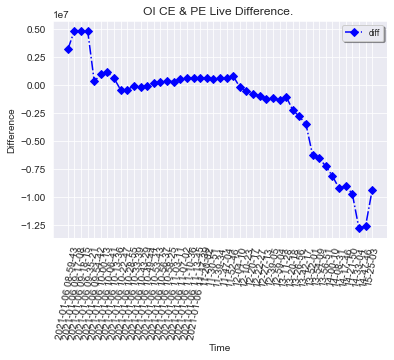

In [1276]:

import matplotlib.pyplot as plt

%matplotlib inline

df=pd.read_csv(name_nifty)
x=df['Date_Time']
y=df['Difference']
plt.plot(x,y,color='blue',marker='D',markersize=6,linestyle="dashdot",label="diff")
#plt.plot(x,df['Strike_price'],label="ST")
plt.xticks(rotation=80)
plt.xlabel("Time")
plt.ylabel("Difference")
plt.title("OI CE & PE Live Difference. ")
plt.legend(loc="best",shadow=True,fontsize="small")#Adding shadow to legend
#plt.savefig('chart.png')

In [1277]:
df4

,Date_Time,Sum_Call_OI,Strike_price,Sum_Put_OI,Difference,Signal
0,2021-01-06 08-59-43,1680000,14200,4836450,3156450,Buy CE
1,2021-01-06 09-17-08,0,14200,4836450,4836450,Buy CE
2,2021-01-06 09-18-15,0,14200,4836450,4836450,Buy CE
3,2021-01-06 09-35-21,0,14200,4836450,4836450,Buy CE
4,2021-01-06 09-54-42,3480525,14250,3779925,299400,Buy CE
5,2021-01-06 10-00-13,3789300,14250,4729800,940500,Buy CE
6,2021-01-06 10-06-41,4157400,14250,5260950,1103550,Buy CE
7,2021-01-06 10-13-36,4871250,14200,5444025,572775,Buy CE
8,2021-01-06 10-22-47,5329950,14200,4867800,-462150,Buy PE
9,2021-01-06 10-28-55,5499075,14200,5065875,-433200,Buy PE
